In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.preprocessing as sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import quantile_transform
from sklearn.preprocessing import minmax_scale

from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer

from scipy.stats import boxcox
import sklearn.preprocessing as sklearn
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import (StandardScaler, MinMaxScaler)
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from scipy.stats import iqr
from scipy.stats import scoreatpercentile as pct
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import RFE
import statsmodels.api as sm

In [2]:
df = pd.read_excel("Data/midterm_project_cleaned.xlsx")

In [3]:
df.shape

(21596, 25)

In [4]:
df.zipcode.value_counts()

98103    601
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [5]:
df.drop(["Unnamed: 0"], axis = 1, inplace = True)

In [6]:
df['avg_price_by_zipcode'] = round(df.groupby(['zipcode'])['price'].transform('mean'),2)

In [171]:
df.head(25)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,...,sqft_living15,sqft_lot15,price,renovated,basement,decade,geo1,geo2,avg_price_by_zipcode,avg_price_by_zipcode_binned
0,3,1.00,1180,5650,1.0,0,0,3,7,0,...,1340,5650,221900,False,False,2,centre,west,310612.76,1
1,3,2.25,2570,7242,2.0,0,0,3,7,400,...,1690,7639,538000,True,True,2,north,west,469928.77,3
2,2,1.00,770,10000,1.0,0,0,3,6,0,...,2720,8062,180000,False,False,2,north,west,462488.87,3
3,4,3.00,1960,5000,1.0,0,0,5,7,910,...,1360,5000,604000,False,True,3,centre,west,551768.52,3
4,3,2.00,1680,8080,1.0,0,0,3,8,0,...,1800,7503,510000,False,False,3,north,centre,685675.84,5
5,4,4.50,5420,101930,1.0,0,0,3,11,1530,...,4760,101930,1230000,False,True,4,north,centre,677215.03,4
6,3,2.25,1715,6819,2.0,0,0,3,7,0,...,2238,6819,257500,False,False,4,south,west,294111.28,1
7,3,1.50,1060,9711,1.0,0,0,3,7,0,...,1650,9711,291850,False,False,3,centre,west,302896.74,1
8,3,1.00,1780,7470,1.0,0,0,3,7,730,...,1780,8113,229500,False,True,3,centre,west,359496.26,2
9,3,2.50,1890,6560,2.0,0,0,3,7,0,...,2390,7570,323000,False,False,4,centre,centre,367091.48,2


In [7]:
avg_price_by_zipcode_labels = ["1", "2", "3", "4", "5"]
df['avg_price_by_zipcode_binned'] = pd.qcut(df['avg_price_by_zipcode'],5, labels=avg_price_by_zipcode_labels)

In [8]:
df['avg_price_by_zipcode'].describe()

count    2.159600e+04
mean     5.402920e+05
std      2.344473e+05
min      2.342840e+05
25%      3.594963e+05
50%      4.936253e+05
75%      6.452442e+05
max      2.161300e+06
Name: avg_price_by_zipcode, dtype: float64

In [9]:
df.avg_price_by_zipcode_binned.value_counts()

4    4616
1    4380
2    4365
3    4278
5    3957
Name: avg_price_by_zipcode_binned, dtype: int64

In [10]:
# Dropping highly correlated columns sqft_living and sqft_above
## sqft_living: living area of the home; area that can be heated or cooled 
## sqft_above: area above the basement; living area minus attic
df.drop(["sqft_above"], axis = 1, inplace = True)

In [11]:
decade_dict = {"Category A": 1, "Category B": 2, "Category C": 3, "Category D": 4}
df = df.replace({"decade": decade_dict})

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21596 entries, 0 to 21595
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   bedrooms                     21596 non-null  int64   
 1   bathrooms                    21596 non-null  float64 
 2   sqft_living                  21596 non-null  int64   
 3   sqft_lot                     21596 non-null  int64   
 4   floors                       21596 non-null  float64 
 5   waterfront                   21596 non-null  int64   
 6   view                         21596 non-null  int64   
 7   condition                    21596 non-null  int64   
 8   grade                        21596 non-null  int64   
 9   sqft_basement                21596 non-null  int64   
 10  yr_built                     21596 non-null  int64   
 11  yr_renovated                 21596 non-null  int64   
 12  zipcode                      21596 non-null  int64   
 13  l

In [146]:
# Looking for highly correlated columns

correlation_matrix = df.corr()

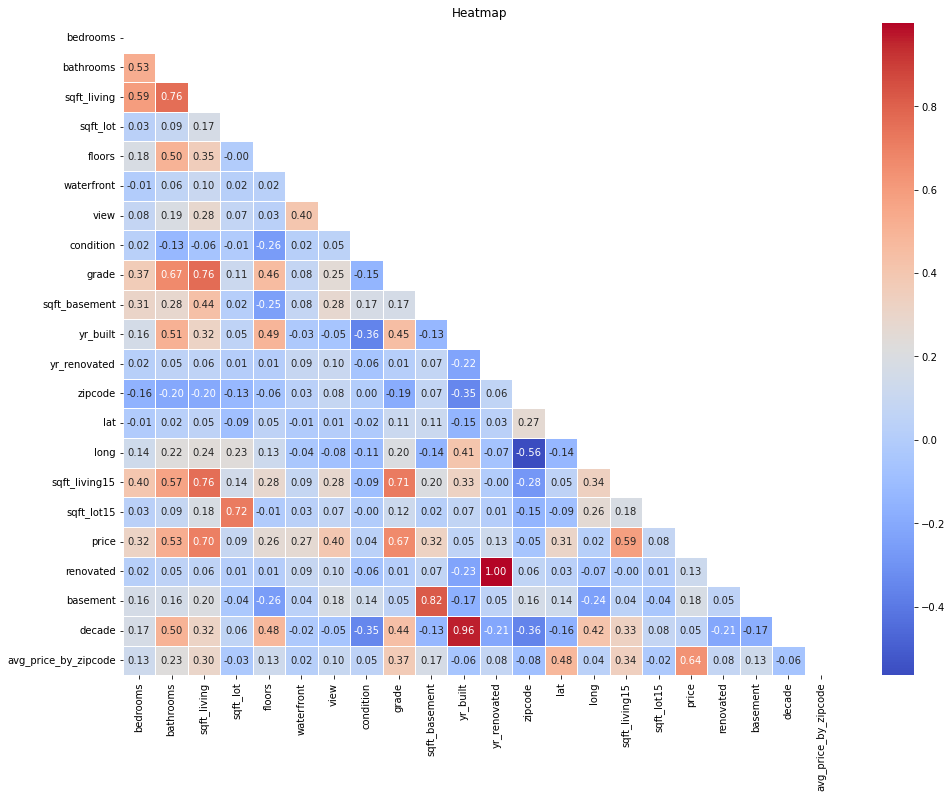

In [152]:
fig5, ax = plt.subplots(figsize = (16,12))

ax.set_title("Heatmap")

corr = df.corr()

# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(corr)

# using the upper triangle matrix as mask 
sns.heatmap(corr, cmap = "coolwarm", linewidth = 1, annot=True,  fmt = ".2f", mask=matrix)

plt.show()

In [170]:
df["sqft_lot"].min()

520

<AxesSubplot:xlabel='sqft_lot15', ylabel='Count'>

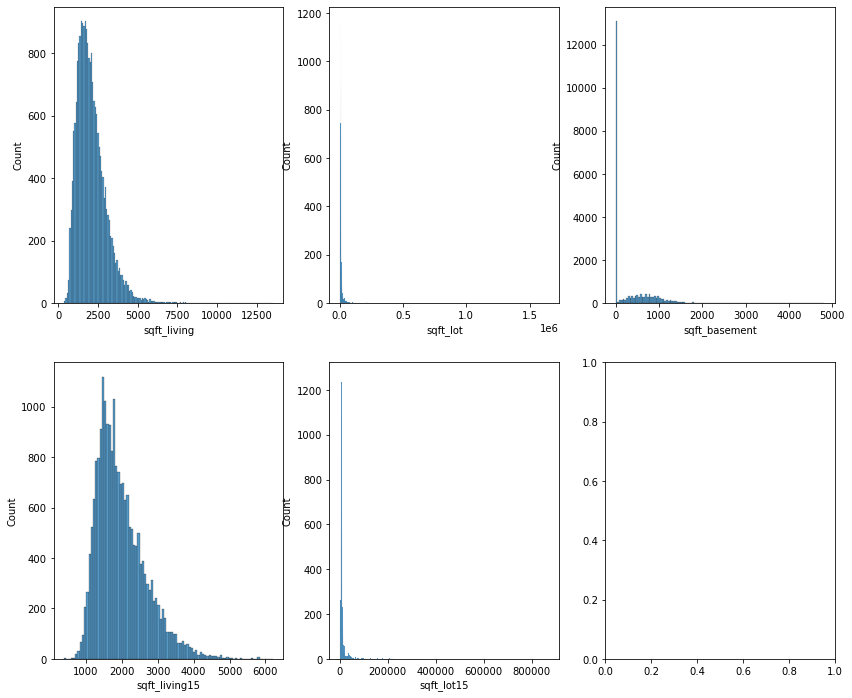

In [143]:
fig, axe = plt.subplots(2,3,figsize = (14,12))

sns.histplot(df, x=df.loc[:, "sqft_living"], ax = axe[0,0]) 
sns.histplot(df, x=df.loc[:, "sqft_lot"], ax = axe [0,1])
sns.histplot(df, x=df.loc[:, "sqft_basement"], ax = axe [0,2])
sns.histplot(df, x=df.loc[:, "sqft_living15"], ax = axe [1,0])
sns.histplot(df, x=df.loc[:, "sqft_lot15"], ax = axe [1,1])

In [15]:
# X/y split
X = df.drop("price", axis=1)
y = df["price"]

In [16]:
# Train/test split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.30,random_state=123)

In [17]:
X_train.reset_index
y_train.reset_index

<bound method Series.reset_index of 11950    325000
17781    389000
3405     442000
740      360000
848      512000
          ...  
7763     620000
15377    424900
17730    272450
15725    260000
19966    479000
Name: price, Length: 15117, dtype: int64>

In [18]:
X_train.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'renovated', 'basement', 'decade', 'geo1', 'geo2',
       'avg_price_by_zipcode', 'avg_price_by_zipcode_binned'],
      dtype='object')

In [107]:
# 3.Splitting into X_train_num, X_train_cat, X_test_num, X_test_cat

X_train_num = X_train[["sqft_living", "sqft_basement", "sqft_lot", "sqft_living15"]]
X_train_cat = X_train[["bedrooms", "bathrooms", "avg_price_by_zipcode", "lat", "long", "yr_renovated", "waterfront", "view", "grade", "decade", "geo1", "geo2"]]
X_test_num = X_test[["sqft_living", "sqft_basement", "sqft_lot", "sqft_living15"]]
X_test_cat = X_test[["bedrooms", "bathrooms", "avg_price_by_zipcode", "lat", "long", "yr_renovated", "waterfront", "view", "grade", "decade", "geo1", "geo2"]]

In [108]:
# 4.Applying minmax scaler to X_train_num, X_test_num (scaling)

# Fitting on X_train_num
scaler = MinMaxScaler() 
scaler.fit(X_train_num)

# Transforming X_train num and X_test_num
X_train_num_scaled = pd.DataFrame(scaler.transform(X_train_num), columns=X_train_num.columns).reset_index(drop=True)
X_test_num_scaled = pd.DataFrame(scaler.transform(X_test_num), columns=X_test_num.columns).reset_index(drop=True)

# 5.a: Applying power transformer (normalizing) to sqft_living

# Fitting on X_train_num

transformer = PowerTransformer()
sqft_living_transformer = transformer.fit(X_train_num_scaled['sqft_living'].to_numpy().reshape(-1,1))

# Normalizing X_train_num and X_test_num

X_train_num_scaled["sqft_living"] = sqft_living_transformer.transform(X_train_num_scaled["sqft_living"].to_numpy().reshape(-1,1))
X_test_num_scaled["sqft_living"] = sqft_living_transformer.transform(X_test_num_scaled["sqft_living"].to_numpy().reshape(-1,1))

# Plotting sqft_living distribution after normalization
fig = plt.subplots()

sns.histplot(X_train_num_scaled, x=X_train_num_scaled.loc[:, "sqft_living"])

# 5.b: Applying quantile transformer (normalizing) to sqft_lot

# Fitting on X_train_num

transformer = PowerTransformer()
sqft_living_transformer = transformer.fit(X_train_num_scaled['sqft_lot'].to_numpy().reshape(-1,1))

# Normalizing X_train_num and X_test_num

X_train_num_scaled["sqft_lot"] = sqft_living_transformer.transform(X_train_num_scaled["sqft_lot"].to_numpy().reshape(-1,1))
X_test_num_scaled["sqft_lot"] = sqft_living_transformer.transform(X_test_num_scaled["sqft_lot"].to_numpy().reshape(-1,1))

fig = plt.subplots()

sns.histplot(X_train_num_scaled, x=X_train_num_scaled.loc[:, "sqft_lot"])

# 5.c: Applying quantile transformer (normalizing) to sqft_living15

# Fitting on X_train_num

transformer = QuantileTransformer(output_distribution='normal')
sqft_living_transformer = transformer.fit(X_train_num_scaled['sqft_living15'].to_numpy().reshape(-1,1))

# Normalizing X_train_num and X_test_num

X_train_num_scaled["sqft_living15"] = sqft_living_transformer.transform(X_train_num_scaled["sqft_living15"].to_numpy().reshape(-1,1))
X_test_num_scaled["sqft_living15"] = sqft_living_transformer.transform(X_test_num_scaled["sqft_living15"].to_numpy().reshape(-1,1))

fig = plt.subplots()

sns.histplot(X_train_num_scaled, x=X_train_num_scaled.loc[:, "sqft_living15"])

# 5.d: Applying quantile transformer (normalizing) to sqft_lot15

# Fitting on X_train_num

transformer = QuantileTransformer(output_distribution='normal')
sqft_living_transformer = transformer.fit(X_train_num_scaled['sqft_lot15'].to_numpy().reshape(-1,1))

# Normalizing X_train_num and X_test_num

X_train_num_scaled["sqft_lot15"] = sqft_living_transformer.transform(X_train_num_scaled["sqft_lot15"].to_numpy().reshape(-1,1))
X_test_num_scaled["sqft_lot15"] = sqft_living_transformer.transform(X_test_num_scaled["sqft_lot15"].to_numpy().reshape(-1,1))

fig = plt.subplots()

sns.histplot(X_train_num_scaled, x=X_train_num_scaled.loc[:, "sqft_lot15"])

In [195]:
# 6. Splitting categorical columns into nominal and categorical ones

X_train_cat_nom = X_train_cat[["geo1", "geo2"]]
X_test_cat_nom = X_test_cat[["geo1", "geo2"]]

# Leaving only ordinal 

X_train_cat_ord = X_train_cat[["bedrooms", "bathrooms", "avg_price_by_zipcode", "waterfront", "yr_renovated", "view", "grade", "decade"]]
X_test_cat_ord = X_test_cat[["bedrooms", "bathrooms", "avg_price_by_zipcode", "waterfront", "yr_renovated", "view", "grade", "decade"]]


In [196]:
# 6.a Hot encoding nominal columns

X_train_cat_nom_encoded = pd.get_dummies(X_train_cat_nom, drop_first = True)
X_test_cat_nom_encoded = pd.get_dummies(X_test_cat_nom, drop_first = True)

X_test_cat_nom_encoded.describe()

In [197]:
# 6.b Reseting indexes before concatenating

X_train_cat_nom_encoded.reset_index(drop=True, inplace=True)
X_test_cat_nom_encoded.reset_index(drop=True, inplace=True)
X_train_cat_ord.reset_index(drop=True, inplace=True)
X_test_cat_ord.reset_index(drop=True, inplace=True)

In [198]:
X_test_cat_ord.head()

,bedrooms,bathrooms,avg_price_by_zipcode,waterfront,yr_renovated,view,grade,decade
0,4,2.50,353619.07,0,0,0,8,4
1,2,1.50,551768.52,0,0,0,7,4
2,2,2.25,584957.35,0,0,0,8,4
3,3,1.00,685675.84,0,0,0,6,2
4,3,1.00,286742.81,0,0,2,5,2


In [199]:
# 6.c Concatenating nominal and ordinal

X_train_cat_ready = pd.concat([X_train_cat_nom_encoded, X_train_cat_ord], axis = 1)
X_test_cat_ready = pd.concat([X_test_cat_nom_encoded, X_test_cat_ord], axis = 1)

In [200]:
# Concatenating X_train and X_test dataframes

X_train_num_scaled.reset_index(drop=True, inplace=True)
X_train_cat.reset_index(drop=True, inplace = True)
X_test_num_scaled.reset_index(drop=True, inplace=True)
X_test_cat.reset_index(drop=True, inplace = True)


X_train_ready = pd.concat([X_train_num_scaled, X_train_cat_ready], axis = 1)
X_test_ready = pd.concat([X_test_num_scaled, X_test_cat_ready], axis = 1)

In [201]:
model=LinearRegression()    
model.fit(X_train_ready, y_train)   

LinearRegression()

In [202]:
model.score(X_test_ready, y_test)

0.7720318040343745

In [203]:
# Running a prediction on X_train_ready to compare the model score with the one from X_test_ready

model.score(X_train_ready, y_train)

0.7949943939111016

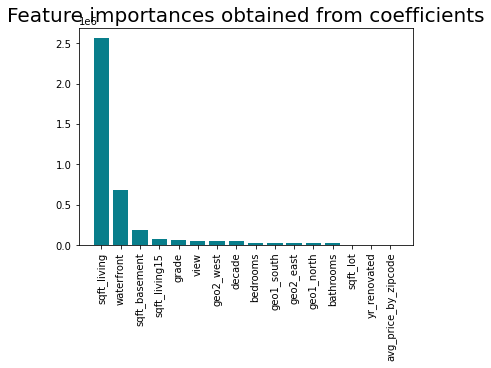

In [204]:
features_importances = pd.DataFrame(data={
    'Attribute': X_train_ready.columns,
    'Importance': abs(model.coef_)
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)

plt.bar(x=features_importances['Attribute'], height=features_importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [205]:
model.coef_

array([ 2.56415361e+06, -1.89848852e+05, -1.94668117e+03, -7.87113052e+04,
        2.14725538e+04, -2.47643235e+04, -2.18214417e+04,  4.78407338e+04,
       -2.60125905e+04,  2.09170559e+04,  6.26031457e-01,  6.85360313e+05,
        2.18430130e+00,  5.28495876e+04,  5.92515472e+04, -4.55766382e+04])

In [206]:
y_pred=model.predict(X_test_ready)   

In [207]:
R2=r2_score(y_test,y_pred)
R2

0.7720318040343745

In [208]:
Adj_R2= 1 - (1-R2)*(len(y_test)-1)/(len(y_test)-X_test_ready.shape[1]-1)
Adj_R2

0.7714673516766757

In [223]:
Adj_R2_train= 1 - (1-R2)*(len(y_test)-1)/(len(y_test)-X_train_ready.shape[1]-1)
Adj_R2_train

In [214]:
# Error metrics
print(mse(y_test,y_pred))
print(mae(y_test,y_pred))
RMSE = mse(y_test, y_pred, squared=False)
print(RMSE)

31661661600.938
103506.36231645556
177937.24062415378


In [222]:
y_pred_train = model.predict(X_train_ready)   
print(mse(y_train, y_pred_train))
print(mae(y_train, y_pred_train))
RMSE_train = mse(y_train, y_pred_train, squared=False)
print(RMSE_train)

27321275631.971737
100846.98319551034
165291.48687083597
